# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
import pandas
from IPython.display import display, HTML
%matplotlib inline

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/mwu3/Deep_learning/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
testing_file = '/home/mwu3/Deep_learning/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
labels = {}
import csv
with open('/home/mwu3/Deep_learning/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/signnames.csv', 'rt') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        if row[0] != 'ClassId':
            labels[int(row[0])]=row[1]

Stop


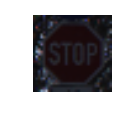

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.


index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
plt.axis('off')
print(labels[y_train[index]])

In [5]:
signs = []
for sign_type in range(42):
    sign_type_index = next(i for i,y in enumerate(y_train) if y==sign_type)
    signs.append(X_train[sign_type_index])

In [6]:
from collections import Counter
sign_count_table = []
for key,value in dict(Counter(y_train)).items():
    sign_count_table.append([labels[key],value])
pandas.DataFrame(sign_count_table,[i for i in range(n_classes)],['sign type','count'])

,sign type,count
0,Speed limit (20km/h),210
1,Speed limit (30km/h),2220
2,Speed limit (50km/h),2250
3,Speed limit (60km/h),1410
4,Speed limit (70km/h),1980
5,Speed limit (80km/h),1860
6,End of speed limit (80km/h),420
7,Speed limit (100km/h),1440
8,Speed limit (120km/h),1410
9,No passing,1470


([<matplotlib.axis.XTick at 0x2b0ac1002518>,
 <a list of 43 Text xticklabel objects>)

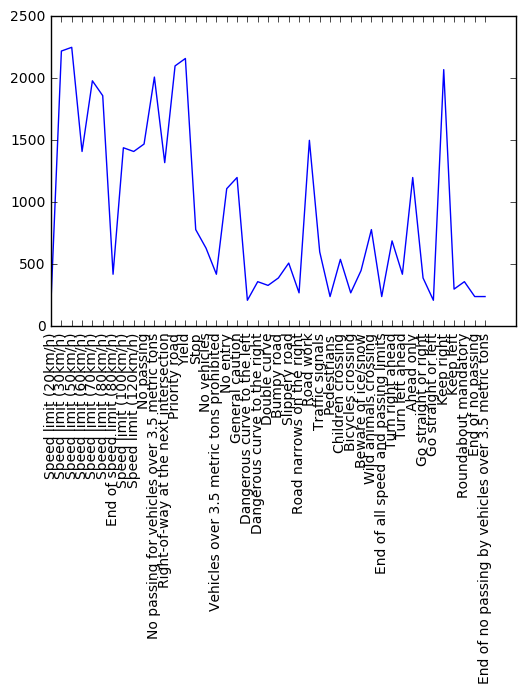

In [7]:
xls=[i for i in range(43)]
plt.plot([i[1] for i in sign_count_table])
ticks = [i[0] for i in sign_count_table]
plt.xticks(xls,ticks, rotation='vertical')

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def normalize_color_image(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    a = 0.1
    b = 0.9
    
    return list(map(lambda x: a + x*(b-a)/255.,image_data))



X_train = np.array(normalize_color_image(X_train))
X_test = np.array(normalize_color_image(X_test))

X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
Normalize the image so that the image value are in the range of 0.1 to 0.9. The normalization of the data will have two benifits: 1. Reduce the numerical error. 2. Make it easier for the optimizer by changing the problem to a well-conditioned one.
I use 0.1 to 0.9 instead of -0.5 to 0.5 because it gives a better accuracy on the new images in question 6.
I choose to keep the color instead of using grayscle. This is from the consideration that usually the signs are painted in colors and the colors provides a great deal of information.

In [9]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print('training size: {}, validation size: {}'.format(X_train.shape[0],X_validation.shape[0]))

training size: 31367, validation size: 7842


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
Use train_test_split to seperate 20% from the training set as the validation set.

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    conv1    = tf.nn.dropout(conv1, keep_prob)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    fc2    = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The final model is modified from the LeNet model. I've added two dropout layers after the convolution layers. The dropout layers increase the prediction accuarcy. So the final model has 5 layers:

* layer 1: convolution layer (5X5X3X6), dropout layer,max pooling layer (2X2)
* layer 2: convolution layer (5X5X6X16), max pooling layer(2X2), flatten layer
* layer 3: full connected layer (400X120)
* layer 4: full connected layer (120X84), dropout layer
* layer 5: full connected layer (84X43)

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

rate = 0.001
EPOCHS = 50
BATCH_SIZE = 128

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.5})
            
        validation_accuracy = evaluate(X_validation, y_validation,0.5)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, 'lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.525

EPOCH 2 ...
Validation Accuracy = 0.726

EPOCH 3 ...
Validation Accuracy = 0.799

EPOCH 4 ...
Validation Accuracy = 0.842

EPOCH 5 ...
Validation Accuracy = 0.874

EPOCH 6 ...
Validation Accuracy = 0.894

EPOCH 7 ...
Validation Accuracy = 0.897

EPOCH 8 ...
Validation Accuracy = 0.924

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.928

EPOCH 11 ...
Validation Accuracy = 0.937

EPOCH 12 ...
Validation Accuracy = 0.936

EPOCH 13 ...
Validation Accuracy = 0.942

EPOCH 14 ...
Validation Accuracy = 0.942

EPOCH 15 ...
Validation Accuracy = 0.949

EPOCH 16 ...
Validation Accuracy = 0.949

EPOCH 17 ...
Validation Accuracy = 0.953

EPOCH 18 ...
Validation Accuracy = 0.948

EPOCH 19 ...
Validation Accuracy = 0.959

EPOCH 20 ...
Validation Accuracy = 0.964

EPOCH 21 ...
Validation Accuracy = 0.961

EPOCH 22 ...
Validation Accuracy = 0.962

EPOCH 23 ...
Validation Accuracy = 0.966

EPOCH 24 ...
Validation Accura

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I'm using these hyper-parameters:
* batch size: 128, 
* learning rate: 0.001,
* epochs: 50,
* keep probability: 0.5

I started from the LeNet lab parameters. I tried a few different learning rate and batch size and found that batch size=128 and learning rate=0.001 can give me the highest validataion accuracy. In the LeNet lab, I was using epochs=20, and I found that by adding dropout and increase it to 50, I can get a much higher validatiaon accuracy.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
When using the original LeNet, the accuracy is about 88%. I tried to add the dropout, which boosts the accuracy to about 90%. Then I add apply the normalizations to the images, and set the epochs to 50, which finally gives a accuracy of 94%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

# test with the test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.944


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The traffic signs that are not in the training set will be certainly predicted wrong.

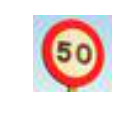

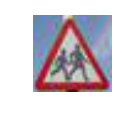

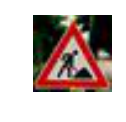

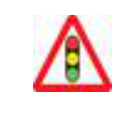

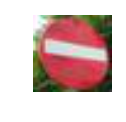

In [14]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import glob
test_imgs = np.array([plt.imread(i) for i in glob.glob('/home/mwu3/Deep_learning/CarND-Traffic-Sign-Classifier-Project/*.jpg')])
for i in test_imgs:
    plt.figure(figsize = (1,1))
    plt.imshow(i)
    plt.axis('off')

In [15]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.softmax(logits),feed_dict={x:normalize_color_image(test_imgs), keep_prob:1.0})
    print(list(map(lambda x:labels[x], np.argmax(results,axis=-1))))

['Speed limit (50km/h)', 'Children crossing', 'Road work', 'General caution', 'No entry']


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model perform very well (80%) for the pictures from the web, which is lower than that of the test set.

In [16]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    results = sess.run(tf.nn.top_k(tf.nn.softmax(logits),k=5),feed_dict={x:normalize_color_image(test_imgs), keep_prob:1.0})
    print(results[0])
    print([list(map(lambda x:labels[x],i)) for i in results[1]])

[[  6.11996651e-01   3.87578249e-01   3.83263570e-04   2.38523971e-05
    1.80219286e-05]
 [  9.90965486e-01   3.65502527e-03   3.17104836e-03   1.46444433e-03
    4.18130134e-04]
 [  1.00000000e+00   2.83622104e-08   6.49452991e-11   2.78837310e-13
    2.06856152e-13]
 [  9.99994159e-01   5.81245331e-06   6.98323621e-10   4.97907493e-10
    6.09920794e-11]
 [  1.00000000e+00   5.31999653e-11   3.21870725e-11   1.13990544e-11
    4.41638506e-14]]
[['Speed limit (50km/h)', 'Speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (60km/h)', 'Speed limit (30km/h)'], ['Children crossing', 'Right-of-way at the next intersection', 'Beware of ice/snow', 'Dangerous curve to the right', 'Bicycles crossing'], ['Road work', 'Keep right', 'Dangerous curve to the right', 'Slippery road', 'Yield'], ['General caution', 'Traffic signals', 'Priority road', 'Pedestrians', 'Right-of-way at the next intersection'], ['No entry', 'Turn left ahead', 'Speed limit (60km/h)', 'Stop', 'No passing for vehicl

In [17]:
tables = []
for img in range(5):
    tables.append(pandas.DataFrame([list(zip(i,map(lambda x: labels[x], j))) for i,j in zip(results[0],results[1])][img],['1','2','3','4','5'],['probability','prediction']))
for i in range(5):
    display(tables[i])

,probability,prediction
1,0.611997,Speed limit (50km/h)
2,0.387578,Speed limit (80km/h)
3,0.000383,Speed limit (100km/h)
4,0.000024,Speed limit (60km/h)
5,0.000018,Speed limit (30km/h)


,probability,prediction
1,0.990965,Children crossing
2,0.003655,Right-of-way at the next intersection
3,0.003171,Beware of ice/snow
4,0.001464,Dangerous curve to the right
5,0.000418,Bicycles crossing


,probability,prediction
1,1.000000e+00,Road work
2,2.836221e-08,Keep right
3,6.494530e-11,Dangerous curve to the right
4,2.788373e-13,Slippery road
5,2.068562e-13,Yield


,probability,prediction
1,9.999942e-01,General caution
2,5.812453e-06,Traffic signals
3,6.983236e-10,Priority road
4,4.979075e-10,Pedestrians
5,6.099208e-11,Right-of-way at the next intersection


,probability,prediction
1,1.000000e+00,No entry
2,5.319997e-11,Turn left ahead
3,3.218707e-11,Speed limit (60km/h)
4,1.139905e-11,Stop
5,4.416385e-14,No passing for vehicles over 3.5 metric tons


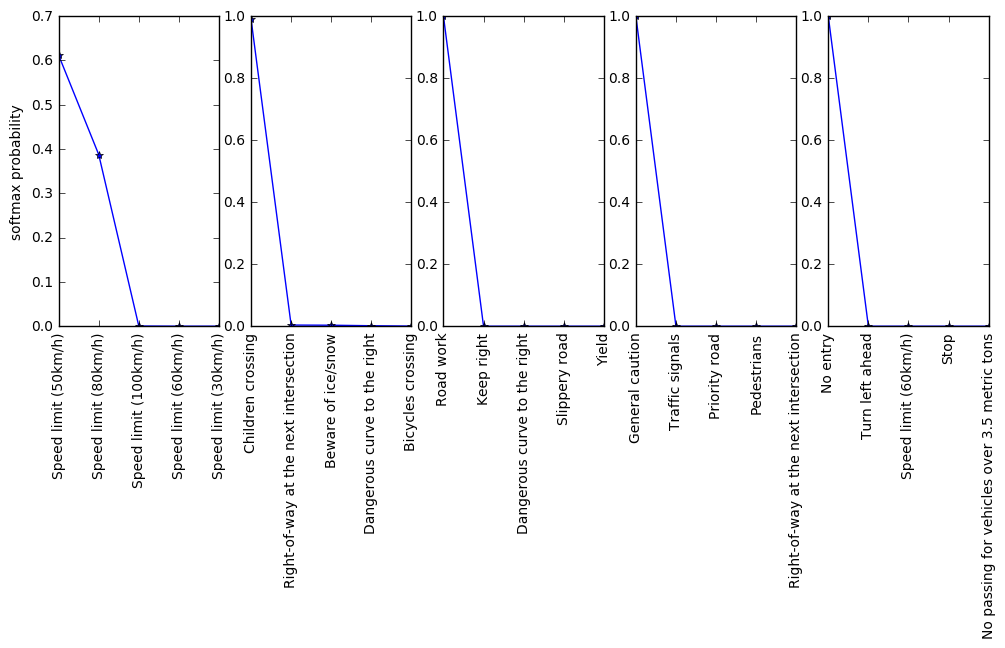

In [31]:
plt.figure(1,plt.figure(figsize=(12,4)))
for img in range(5):
    plt.subplot(1, 5, img+1)
    if img+1 == 1:
        plt.ylabel('softmax probability')
    plt.plot(range(1,6),results[0][img],'*-')
    ticks = list(map(lambda x:labels[x],results[1][img]))
    plt.xticks(range(1,6),ticks, rotation='vertical')
plt.show()

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
The correct prediction has the highest probability for the images I supplied. It seems that the model is good at predicting the shape (for example "road work"), but not so good at predicting the numbers ("Speed limit (50km/h)").

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.